In [1]:
import os
import cv2
import matplotlib.pyplot as plt
from config import DATASET_DIR, IMAGE_RESOLUTION

# Example: set a valid sequence name (choose one that exists in your dataset)
sequence_name = "dog-agility"  # Replace with a valid sequence name
frames_path = os.path.join(DATASET_DIR, "JPEGImages", IMAGE_RESOLUTION, sequence_name)

print("Constructed frames path:", frames_path)
print("Path exists?", os.path.exists(frames_path))

Constructed frames path: datasets/DAVIS_dataset/JPEGImages/480p/dog-agility
Path exists? True


In [2]:
frame_files = sorted(os.listdir(frames_path))
print("Frame files:", frame_files)

Frame files: ['00000.jpg', '00001.jpg', '00002.jpg', '00003.jpg', '00004.jpg', '00005.jpg', '00006.jpg', '00007.jpg', '00008.jpg', '00009.jpg', '00010.jpg', '00011.jpg', '00012.jpg', '00013.jpg', '00014.jpg', '00015.jpg', '00016.jpg', '00017.jpg', '00018.jpg', '00019.jpg', '00020.jpg', '00021.jpg', '00022.jpg', '00023.jpg', '00024.jpg']


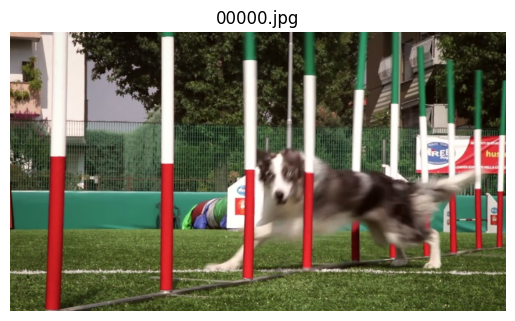

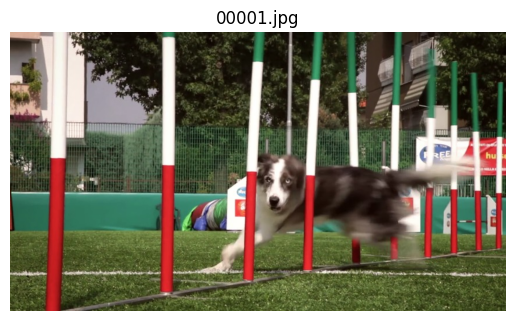

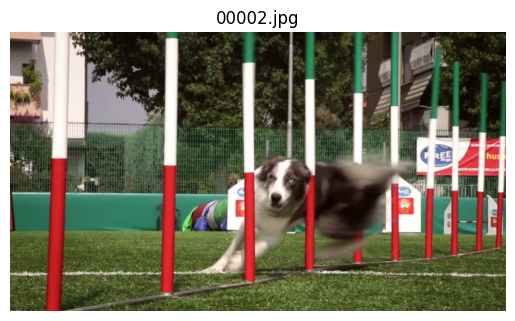

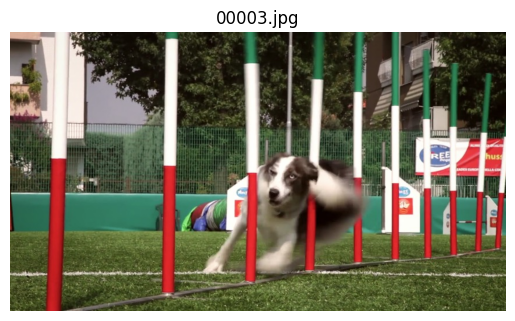

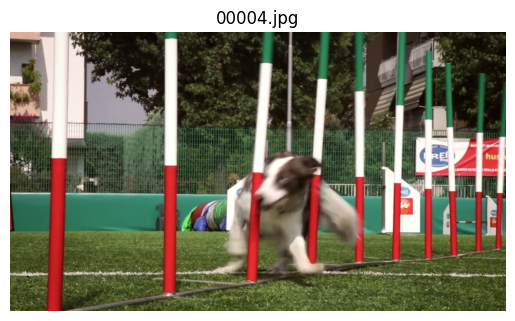

In [3]:
for file in frame_files[:5]:  # Display the first 5 frames
    frame = cv2.imread(os.path.join(frames_path, file))
    # Convert BGR to RGB for matplotlib
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    plt.imshow(frame_rgb)
    plt.title(file)
    plt.axis('off')
    plt.show()

In [5]:
import json

# Load categories.json (adjust the path if necessary)
with open(os.path.join(DATASET_DIR, "categories.json"), 'r') as f:
    categories = json.load(f)
print("Categories:", categories)

# Load davis_semantics.json (adjust the path as needed)
with open(os.path.join(DATASET_DIR, "davis_semantics.json"), 'r') as f:
    davis_semantics = json.load(f)
print("DAVIS Semantics:", davis_semantics)

Categories: {'airplane': {'id': 1, 'super_category': 'vehicle'}, 'backpack': {'id': 2, 'super_category': 'accessory'}, 'ball': {'id': 3, 'super_category': 'sports'}, 'bear': {'id': 4, 'super_category': 'animal'}, 'bicycle': {'id': 5, 'super_category': 'vehicle'}, 'bird': {'id': 6, 'super_category': 'animal'}, 'boat': {'id': 7, 'super_category': 'vehicle'}, 'bottle': {'id': 8, 'super_category': 'kitchen'}, 'box': {'id': 9, 'super_category': 'device'}, 'bus': {'id': 10, 'super_category': 'vehicle'}, 'camel': {'id': 11, 'super_category': 'animal'}, 'car': {'id': 12, 'super_category': 'vehicle'}, 'carriage': {'id': 13, 'super_category': 'vehicle'}, 'cat': {'id': 14, 'super_category': 'animal'}, 'cellphone': {'id': 15, 'super_category': 'electronic'}, 'chamaleon': {'id': 16, 'super_category': 'animal'}, 'cow': {'id': 17, 'super_category': 'animal'}, 'deer': {'id': 18, 'super_category': 'animal'}, 'dog': {'id': 19, 'super_category': 'animal'}, 'dolphin': {'id': 20, 'super_category': 'animal'

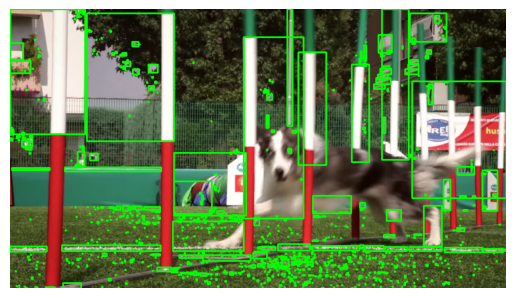

In [6]:
# Example: Compute bounding box from a binary mask
mask = cv2.imread(os.path.join(frames_path, frame_files[0]), cv2.IMREAD_GRAYSCALE)
ret, thresh = cv2.threshold(mask, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

frame = cv2.imread(os.path.join(frames_path, frame_files[0]))
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(frame_rgb)
plt.axis('off')
plt.show()

## Verifiyng that raw frames and segmentation masks are correctly aligned for a given sequence:

Raw frame files: ['00000.jpg', '00001.jpg', '00002.jpg', '00003.jpg', '00004.jpg', '00005.jpg', '00006.jpg', '00007.jpg', '00008.jpg', '00009.jpg', '00010.jpg', '00011.jpg', '00012.jpg', '00013.jpg', '00014.jpg', '00015.jpg', '00016.jpg', '00017.jpg', '00018.jpg', '00019.jpg', '00020.jpg', '00021.jpg', '00022.jpg', '00023.jpg', '00024.jpg']
Mask files: ['00000.png', '00001.png', '00002.png', '00003.png', '00004.png', '00005.png', '00006.png', '00007.png', '00008.png', '00009.png', '00010.png', '00011.png', '00012.png', '00013.png', '00014.png', '00015.png', '00016.png', '00017.png', '00018.png', '00019.png', '00020.png', '00021.png', '00022.png', '00023.png', '00024.png']


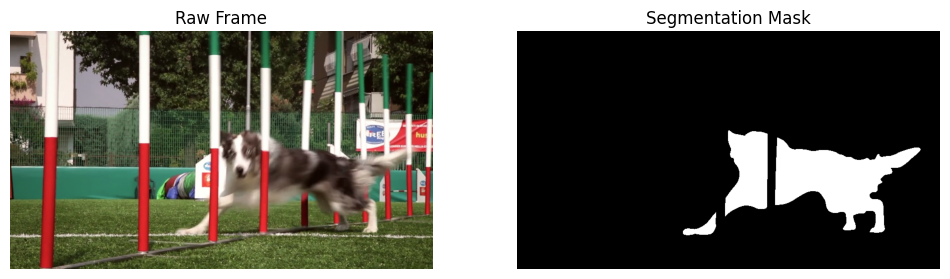

In [13]:
import os
import cv2
import matplotlib.pyplot as plt
from config import DATASET_DIR, IMAGE_RESOLUTION

# Choose a valid sequence name from your dataset 
sequence_name = "dog-agility"  # Replace with an actual sequence name from train/val lists

# Construct paths for raw frames and segmentation masks
raw_frame_dir = os.path.join(DATASET_DIR, "JPEGImages", IMAGE_RESOLUTION, sequence_name)
mask_dir = os.path.join(DATASET_DIR, "Annotations", IMAGE_RESOLUTION, sequence_name)

# List available frame and mask files
frame_files = sorted(os.listdir(raw_frame_dir))
mask_files = sorted(os.listdir(mask_dir))

print("Raw frame files:", frame_files)
print("Mask files:", mask_files)

# Load the first raw frame and its corresponding segmentation mask
frame_path = os.path.join(raw_frame_dir, frame_files[0])
mask_path = os.path.join(mask_dir, mask_files[0])

frame = cv2.imread(frame_path)
mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)  # Load mask in grayscale

# Convert the raw frame from BGR (OpenCV default) to RGB for proper display
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

# Display the raw frame and the segmentation mask side-by-side
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(frame_rgb)
plt.title("Raw Frame")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(mask, cmap='gray')
plt.title("Segmentation Mask")
plt.axis('off')

plt.show()